<a href="https://colab.research.google.com/github/Ariqueeezz/MachineLearningProject/blob/main/Tugas_ML_Pert_13_Clustering'1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries***

In [1]:
# Manipulasi Data
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model Selection
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ***Data Loading***

In [28]:
df = pd.read_excel('/content/dataset_kmean.xlsx')
df

,nim,absensi,tugas,uts,uas
0,1,90,100,90,90
1,2,80,100,90,85
2,3,70,70,70,70
3,4,50,50,55,50
4,5,75,50,55,55
5,6,90,100,90,90
6,7,80,50,50,45
7,8,80,50,50,45
8,9,90,70,70,90
9,10,80,70,80,90


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   nim      12 non-null     int64
 1   absensi  12 non-null     int64
 2   tugas    12 non-null     int64
 3   uts      12 non-null     int64
 4   uas      12 non-null     int64
dtypes: int64(5)
memory usage: 612.0 bytes


In [30]:
df.describe()

,nim,absensi,tugas,uts,uas
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,78.333333,69.166667,68.333333,71.666667
std,3.605551,10.940611,20.652243,16.283474,18.504709
min,1.000000,50.000000,50.000000,50.000000,45.000000
25%,3.750000,75.000000,50.000000,53.750000,53.750000
50%,6.500000,80.000000,70.000000,70.000000,75.000000
75%,9.250000,82.500000,77.500000,82.500000,90.000000
max,12.000000,90.000000,100.000000,90.000000,90.000000


# ***Modelling: K-Means Clustering***

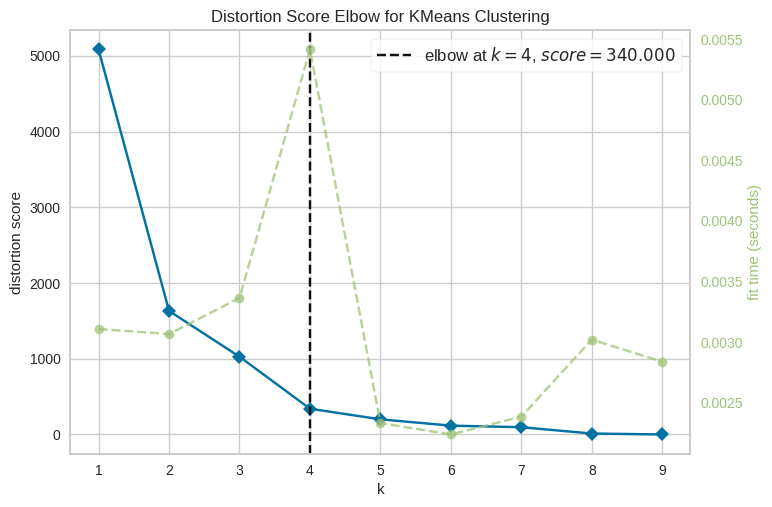

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
X = df.drop(columns=['nim', 'tugas', 'uts']).values

kmeans = KMeans()

# K-Elbow Method
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X)
visualizer.show()

In [32]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [35]:
df['Target'] = y_kmeans
df

,nim,absensi,tugas,uts,uas,Target
0,1,90,100,90,90,1
1,2,80,100,90,85,1
2,3,70,70,70,70,0
3,4,50,50,55,50,0
4,5,75,50,55,55,0
5,6,90,100,90,90,1
6,7,80,50,50,45,0
7,8,80,50,50,45,0
8,9,90,70,70,90,1
9,10,80,70,80,90,1


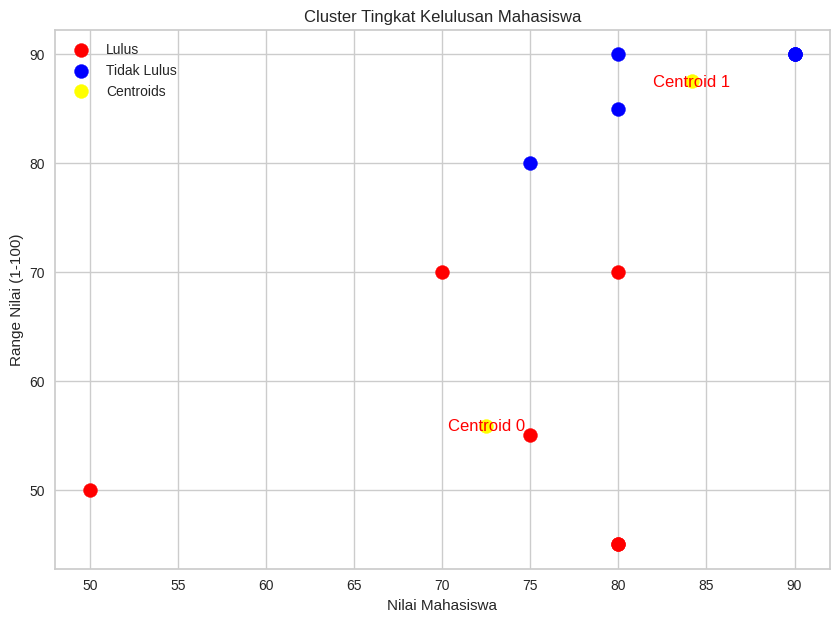

In [36]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Lulus')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Tidak Lulus')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'yellow', label = 'Centroids')

for i, cent in enumerate(centroids):
    plt.text(cent[0], cent[1], f'Centroid {i}', color='red', fontsize=12, ha='center', va='center')

plt.title('Cluster Tingkat Kelulusan Mahasiswa')
plt.xlabel("Nilai Mahasiswa")
plt.ylabel('Range Nilai (1-100)')
plt.legend()
plt.show()